<a href="https://colab.research.google.com/github/Jinyoung3/HackRU/blob/master/stockpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import yfinance as yf
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
company = 'NFLX'
stock_data = yf.Ticker(company)
stock_history = stock_data.history(period='max', interval='1d')
stock_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-05-23 00:00:00-04:00,1.156429,1.242857,1.145714,1.196429,104790000,0.0,0.0
2002-05-24 00:00:00-04:00,1.214286,1.225000,1.197143,1.210000,11104800,0.0,0.0
2002-05-28 00:00:00-04:00,1.213571,1.232143,1.157143,1.157143,6609400,0.0,0.0
2002-05-29 00:00:00-04:00,1.164286,1.164286,1.085714,1.103571,6757800,0.0,0.0
2002-05-30 00:00:00-04:00,1.107857,1.107857,1.071429,1.071429,10154200,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-17 00:00:00-05:00,466.950012,467.649994,462.760010,465.910004,2798500,0.0,0.0
2023-11-20 00:00:00-05:00,465.399994,476.760010,465.399994,474.470001,3617600,0.0,0.0
2023-11-21 00:00:00-05:00,472.630005,477.019989,471.209991,474.950012,2997700,0.0,0.0


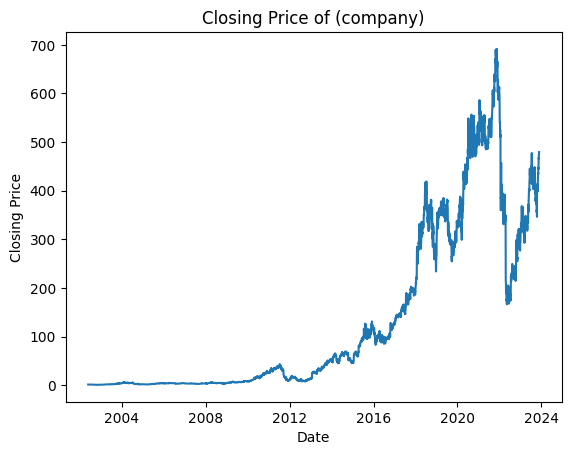

In [ ]:
closing_prices = stock_history['Close']
plt.title(f'Closing Price of (company)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(closing_prices)
plt.show()

In [ ]:
training_data, testing_data = train_test_split(stock_history, test_size=0.2, random_state=42,shuffle=True)


In [ ]:
X_train = training_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_train = training_data['Close']
X_test = testing_data.drop(['Close','Volume','Dividends','Stock Splits'],axis=1)
y_test = testing_data['Close']

In [ ]:
ann_model = Sequential()
ann_model.add(Dense(50,activation='relu',kernel_initializer='he_normal',bias_initializer='ones',input_shape=(X_train.shape[1],1)))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(50,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dropout(rate=0.2))
ann_model.add(Dense(50,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
ann_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

# Checking what the model looks like:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3, 50)             100       
                                                                 
 dropout (Dropout)           (None, 3, 50)             0         
                                                                 
 dense_1 (Dense)             (None, 3, 50)             2550      
                                                                 
 dropout_1 (Dropout)         (None, 3, 50)             0         
                                                                 
 dense_2 (Dense)             (None, 3, 50)             2550      
                                                                 
 dense_3 (Dense)             (None, 3, 1)              51        
                                                                 
Total params: 5251 (20.51 KB)
Trainable params: 5251 (20

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.0006)
loss_function = keras.losses.MeanSquaredError()
ann_model.compile(optimizer,loss_function)

In [ ]:
history = ann_model.fit(X_train,y_train,batch_size=32,epochs=10,shuffle=True)

Epoch 1/10
136/136 [==============================] - 1s 5ms/step - loss: nan
Epoch 2/10
136/136 [==============================] - 1s 4ms/step - loss: nan
Epoch 3/10
136/136 [==============================] - 1s 5ms/step - loss: nan
Epoch 4/10
136/136 [==============================] - 1s 5ms/step - loss: nan
Epoch 5/10
136/136 [==============================] - 1s 5ms/step - loss: nan
Epoch 6/10
136/136 [==============================] - 1s 5ms/step - loss: nan
Epoch 7/10
136/136 [==============================] - 1s 4ms/step - loss: nan
Epoch 8/10
136/136 [==============================] - 1s 4ms/step - loss: nan
Epoch 9/10
136/136 [==============================] - 1s 5ms/step - loss: nan
Epoch 10/10
136/136 [==============================] - 1s 5ms/step - loss: nan


In [ ]:
training_loss = ann_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $nan


In [ ]:
raw_sequence_data_X = []
raw_sequence_data_Y = []
data_list = stock_history.drop(['Volume','Dividends','Stock Splits'],axis=1).values
# Iterating through each example in the stock data
for i in range(len(data_list)):
  sequence = [[0]*4] * 10 # creating a list of ten zeros

  # Checking if there are 10 days worth of past stock data
  if i < 10:
    for x in range(i):
      sequence[x] = list(data_list[x])
  else:
    index = 0
    for x in range(i-10,i):
      sequence[index] = list(data_list[x])
      index += 1
  raw_sequence_data_X.append(sequence)
  raw_sequence_data_Y.append(data_list[i][3])

In [ ]:
sequence_X = np.array(raw_sequence_data_X)
sequence_Y = np.array(raw_sequence_data_Y)

# Checking the shape
sequence_X.shape

(5415, 10, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequence_X,sequence_Y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
rnn_model = Sequential()

# The 50 refers to how big the output vector is
rnn_model.add(SimpleRNN(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# i get 50 dimensional vector as output but i need one number so i add an on top of rnn
rnn_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
rnn_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2750      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 4051 (15.82 KB)
Trainable params: 4051 (15.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
rnn_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
training_loss = rnn_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $218.18271084689547


In [ ]:
testing_loss = rnn_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $210.20616739881825


In [ ]:
gru_model = Sequential()
gru_model.add(GRU(50,activation='tanh',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of our GRU, i get a 40 dimensional vector as our output.
# We need a single number so i add an ANN on top of this RNN.
gru_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
gru_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8400      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9701 (37.89 KB)
Trainable params: 9701 (37.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
gru_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
history = gru_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5


Exception ignored in: <function _xla_gc_callback at 0x7d598d179480>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


136/136 [==============================] - 37s 4ms/step - loss: 47335.8164
Epoch 2/5
136/136 [==============================] - 1s 4ms/step - loss: 47604.3633
Epoch 3/5
136/136 [==============================] - 1s 4ms/step - loss: 47604.3633
Epoch 4/5
136/136 [==============================] - 1s 4ms/step - loss: 47604.3711
Epoch 5/5
136/136 [==============================] - 1s 6ms/step - loss: 47604.3555


In [ ]:
training_loss = gru_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $218.18423264525785


In [ ]:
testing_loss = gru_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $210.20786773156232


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(30,activation='tanh',recurrent_activation='sigmoid',bias_initializer='ones',return_sequences=False,input_shape=(X_train.shape[1],X_train.shape[2])))

# At the end of the LSTM, i get a 50 dimensional vector as the output.
# i need a single number so i add an ANN on top of this RNN.
lstm_model.add(Dense(25,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))
lstm_model.add(Dense(1,activation='relu',kernel_initializer='he_normal',bias_initializer='ones'))

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4200      
                                                                 
 dense_8 (Dense)             (None, 25)                775       
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 5001 (19.54 KB)
Trainable params: 5001 (19.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
loss_function = keras.losses.MeanSquaredError()
lstm_model.compile(optimizer=optimizer,loss=loss_function)

In [ ]:
history = lstm_model.fit(X_train,y_train,batch_size=32,epochs=5,shuffle=True)

Epoch 1/5
136/136 [==============================] - 3s 6ms/step - loss: 36636.0234
Epoch 2/5
136/136 [==============================] - 1s 6ms/step - loss: 40970.5156
Epoch 3/5
136/136 [==============================] - 1s 6ms/step - loss: 36402.8008
Epoch 4/5
136/136 [==============================] - 1s 5ms/step - loss: 33761.5078
Epoch 5/5
136/136 [==============================] - 1s 5ms/step - loss: 32221.0273


In [ ]:
training_loss = lstm_model.evaluate(X_train,y_train,batch_size=32,verbose=0)
print(f'Training Loss in Dollars: ${np.sqrt(training_loss)}')

Training Loss in Dollars: $178.00995188120802


In [ ]:
testing_loss = lstm_model.evaluate(X_test,y_test,batch_size=32,verbose=0)
print(f'Testing Loss in Dollars: ${np.sqrt(testing_loss)}')

Testing Loss in Dollars: $172.00361664983967
